# Data Analysis Notebook

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


In [1]:
Sys.CPU_THREADS

6

In [18]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

exp_index = 2
dir_extension = ""
file_prefix = "test_"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


n_t: 3
exp_index: 2
p_f_max: 0.5
n_subdiv: 12
TEE: [2.0 2.0; 2.0 4.0; 2.0 4.0;;; 2.0 2.0; 2.0 44.0; 2.0 50.0;;; 2.0 2.0; 0.0 25.0; 1.0 10.0;;; 3.0 2.0; 0.0 0.0; 0.0 0.0;;; 2.0 3.0; 0.0 0.0; 0.0 0.0;;; 1.0 1.0; 0.0 0.0; 0.0 0.0;;; 2.0 NaN; 0.0 NaN; 0.0 NaN;;; 0.0 NaN; 0.0 NaN; 0.0 NaN;;; 0.0 NaN; 0.0 NaN; 0.0 NaN;;; 0.0 NaN; 0.0 NaN; 0.0 NaN;;; 0.0 NaN; 0.0 NaN; 0.0 NaN]
sys_type: Init_EdgeSquareLattice_KitaevDoNuT
L: 21
subdiv_array: [2, 4, 5, 7, 9, 10, 12, 14, 16, 18, 19]
t_final: 1000
EE_cut: [41.0 51.0; 41.0 52.0; 41.0 53.0;;; 41.0 40.0; 37.0 48.0; 39.0 59.0;;; 36.0 43.0; 36.0 30.0; 32.0 31.0;;; 39.0 37.0; 22.0 24.0; 26.0 22.0;;; 32.0 34.0; 10.0 10.0; 9.0 7.0;;; 17.0 20.0; 8.0 7.0; 11.0 6.0;;; 23.0 NaN; 7.0 NaN; 5.0 NaN;;; 11.0 NaN; 5.0 NaN; 2.0 NaN;;; 7.0 NaN; 1.0 NaN; 4.0 NaN;;; 1.0 NaN; 3.0 NaN; 6.0 NaN;;; 2.0 NaN; 0.0 NaN; 0.0 NaN;;;; 41.0 46.0; 41.0 55.0; 41.0 56.0;;; 40.0 47.0; 39.0 66.0; 39.0 79.0;;; 39.0 47.0; 36.0 39.0; 34.0 41.0;;; 36.0 37.0; 21.0 20.0; 23.0 17.0;;; 29.0 3

In [19]:
dir_extension = "_2024-03-18"
file_prefix = ""
all_data = []
for exp_index in 1:400
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
    end
end
print("data sets read: ",length(all_data))

data sets read: 393

In [4]:
Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_15  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 18
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_18  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 21
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_21  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 24
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_24  = cat(dims= 4, Observables_t_p...);

TEE_dict = Dict(
    "L15" => Observables_t_p_15,
    "L18" => Observables_t_p_18,
    "L21" => Observables_t_p_21,
    "L24" => Observables_t_p_24
)

TEE_means = Dict(
    "L15" => mean(TEE_dict["L15"], dims = 4),
    "L18" => mean(TEE_dict["L18"], dims = 4),
    "L21" => mean(TEE_dict["L21"], dims = 4),
    "L24" => mean(TEE_dict["L24"], dims = 4)
)

TEE_vars = Dict(
    "L15" => var(TEE_dict["L15"], dims = 4),
    "L18" => var(TEE_dict["L18"], dims = 4),
    "L21" => var(TEE_dict["L21"], dims = 4),
    "L24" => var(TEE_dict["L24"], dims = 4)
)

TEE_err = Dict(
    "L15" => std(TEE_dict["L15"], dims = 4) ./ sqrt(size(TEE_dict["L15"], 4)),
    "L18" => std(TEE_dict["L18"], dims = 4) ./ sqrt(size(TEE_dict["L18"], 4)),
    "L21" => std(TEE_dict["L21"], dims = 4) ./ sqrt(size(TEE_dict["L21"], 4)),
    "L24" => std(TEE_dict["L24"], dims = 4) ./ sqrt(size(TEE_dict["L24"], 4))
)

TEE_medians = Dict(
    "L15" => median(TEE_dict["L15"], dims = 4),
    "L18" => median(TEE_dict["L18"], dims = 4),
    "L21" => median(TEE_dict["L21"], dims = 4),
    "L24" => median(TEE_dict["L24"], dims = 4)
)

TEE_Stats = Dict(
    "mean" => TEE_means,
    "var" => TEE_vars,
    "err" => TEE_err,
    "median" => TEE_medians
)

Dict{String, Dict{String, Array{Float64, 4}}} with 4 entries:
  "median" => Dict("L24"=>[2.0 2.0 … 2.0 2.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … …
  "err"    => Dict("L24"=>[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0780973 0.0956938; … …
  "mean"   => Dict("L24"=>[2.0 2.0 … 2.0 2.0; 2.0 2.0 … 2.08511 2.30851; … ; 2.…
  "var"    => Dict("L24"=>[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.573324 0.860787; … ; …

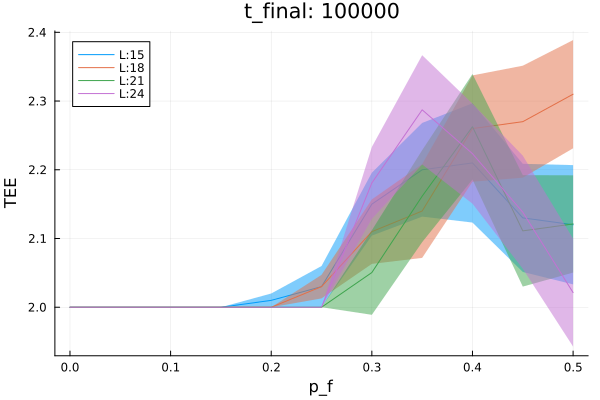

In [5]:
t_cut = 0
stat = "mean"
ribbon = "err"

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L15"][end-t_cut, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


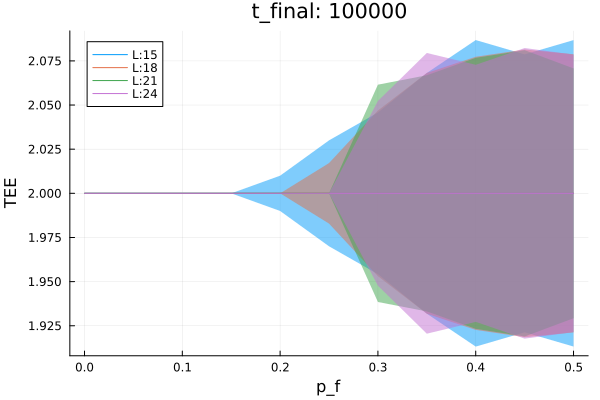

In [6]:
t_cut = 0
stat = "median"
ribbon = "err"

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L15"][end-t_cut, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


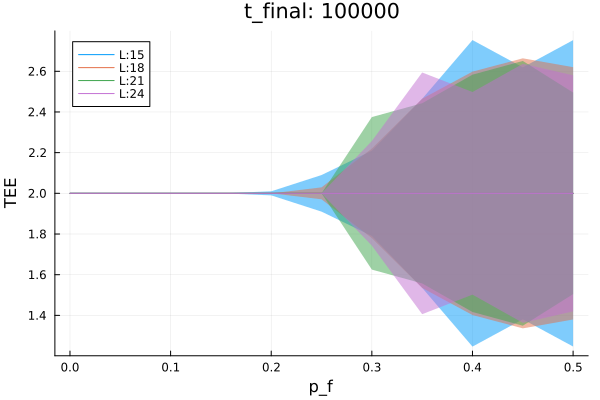

In [7]:
t_cut = 0
stat = "median"
ribbon = "var"

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L15"][end-t_cut, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


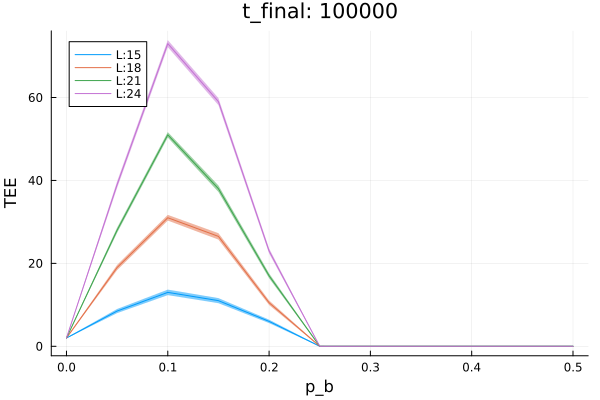

In [8]:
t_cut = 0
p_f_cut = 11
stat = "median"
ribbon = "err"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][end-t_cut, p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


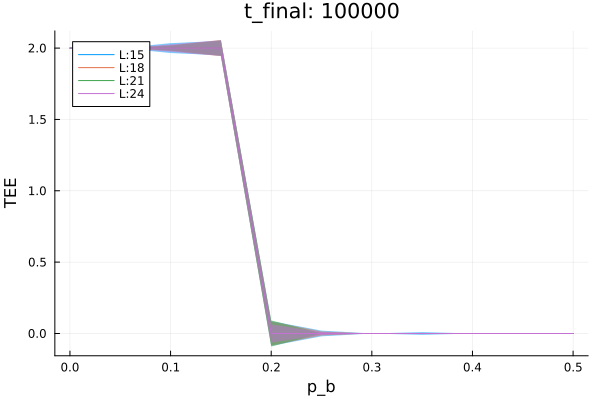

In [9]:
t_cut = 0
p_f_cut = 1
stat = "median"
ribbon = "err"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][end-t_cut, p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


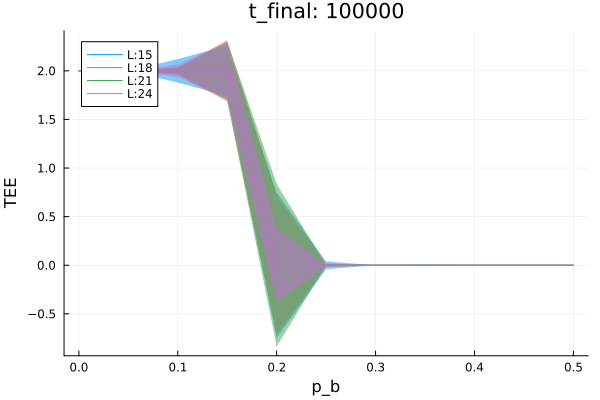

In [10]:
t_cut = 0
p_f_cut = 1
stat = "median"
ribbon = "var"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][end-t_cut, p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


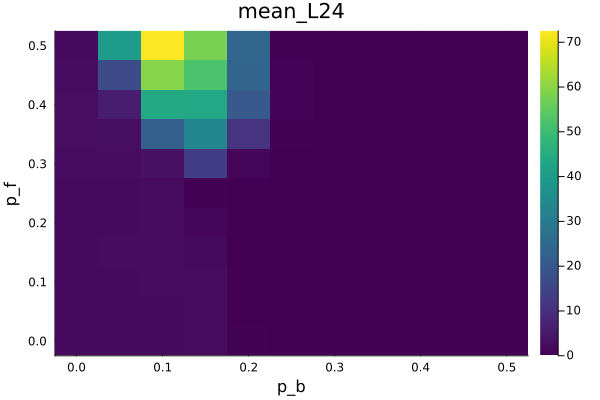

In [11]:
t_cut = 0
stat = "mean"
L = "L24"

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], TEE_Stats[stat][L][end-t_cut, :, :], xlabel="p_b", ylabel="p_f", title="$(stat)_$(L)", color=:viridis)


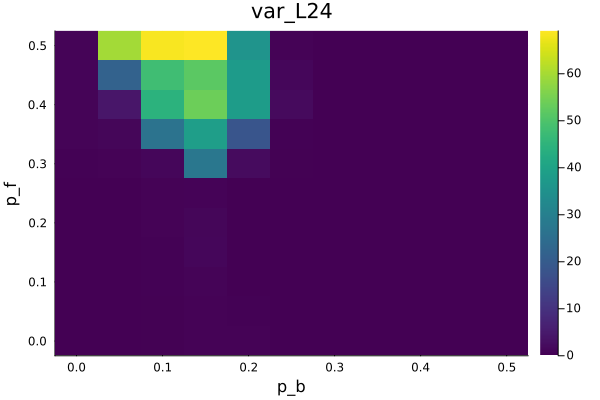

In [12]:
t_cut = 0
stat = "var"
L = "L24"

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], TEE_Stats[stat][L][end-t_cut, :, :], xlabel="p_b", ylabel="p_f", title="$(stat)_$(L)", color=:viridis)


## EE of the Cut

In [13]:
Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_15  = cat(dims= 5, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 18
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_18  = cat(dims= 5, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 21
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_21  = cat(dims= 5, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 24
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_24  = cat(dims= 5, Observables_t_p...)

CUT_dict = Dict(
    "L15" => Observables_t_p_15,
    "L18" => Observables_t_p_18,
    "L21" => Observables_t_p_21,
    "L24" => Observables_t_p_24
)

CUT_means = Dict(
    "L15" => mean(CUT_dict["L15"], dims = 5),
    "L18" => mean(CUT_dict["L18"], dims = 5),
    "L21" => mean(CUT_dict["L21"], dims = 5),
    "L24" => mean(CUT_dict["L24"], dims = 5)
)

CUT_vars = Dict(
    "L15" => var(CUT_dict["L15"], dims = 5),
    "L18" => var(CUT_dict["L18"], dims = 5),
    "L21" => var(CUT_dict["L21"], dims = 5),
    "L24" => var(CUT_dict["L24"], dims = 5)
)

CUT_err = Dict(
    "L15" => std(CUT_dict["L15"], dims = 5) ./ sqrt(size(CUT_dict["L15"], 5)),
    "L18" => std(CUT_dict["L18"], dims = 5) ./ sqrt(size(CUT_dict["L18"], 5)),
    "L21" => std(CUT_dict["L21"], dims = 5) ./ sqrt(size(CUT_dict["L21"], 5)),
    "L24" => std(CUT_dict["L24"], dims = 5) ./ sqrt(size(CUT_dict["L24"], 5))
)

CUT_medians = Dict(
    "L15" => median(CUT_dict["L15"], dims = 5),
    "L18" => median(CUT_dict["L18"], dims = 5),
    "L21" => median(CUT_dict["L21"], dims = 5),
    "L24" => median(CUT_dict["L24"], dims = 5)
)

CUT_Stats = Dict(
    "mean" => CUT_means,
    "var" => CUT_vars,
    "err" => CUT_err,
    "median" => CUT_medians
)


Dict{String, Dict{String, Array{Float64, 5}}} with 4 entries:
  "median" => Dict("L24"=>[47.0 47.0 … 57.0 57.5; 47.0 47.0 … 60.0 61.0; … ; 47…
  "err"    => Dict("L24"=>[0.0 0.0873085 … 0.265635 0.282656; 0.0 0.102444 … 0.…
  "mean"   => Dict("L24"=>[47.0 47.5957 … 56.766 57.6064; 47.0 47.7872 … 59.989…
  "var"    => Dict("L24"=>[0.0 0.716541 … 6.63281 7.51007; 0.0 0.986502 … 4.720…

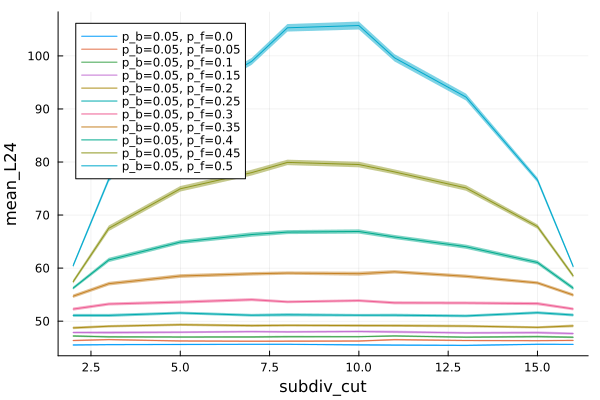

In [14]:
t_cut = 0
p_b_ind = 2
p_b = model_data["p_b_arr"][p_b_ind]
stat = "mean"
L = "L24"
ribbon = "err"

p_f_ind = 1
p_f = model_data["p_f_arr"][p_f_ind]
plot(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 2
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 3
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 4
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 5
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 6
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 7
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 8
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 9
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 10
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 11
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")


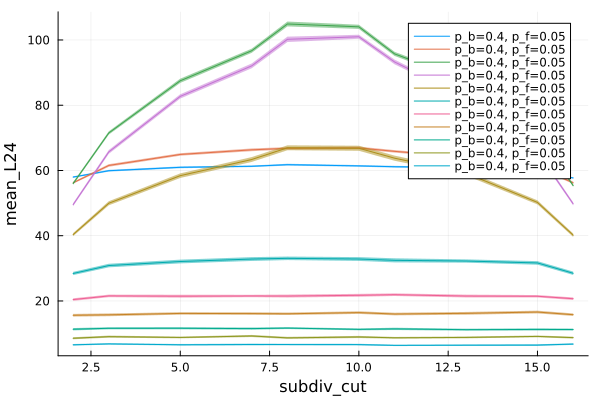

In [15]:
t_cut = 0
p_f_ind = 9
p_f = model_data["p_b_arr"][p_b_ind]
stat = "mean"
L = "L24"
ribbon = "err"

p_b_ind = 1
p_b = model_data["p_f_arr"][p_f_ind]
plot(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 2
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 3
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 4
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 5
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 6
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 7
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 8
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 9
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 10
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 11
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][end - t_cut, p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")


In [16]:
println(typeof(model_data["TEE"]))
println(typeof(model_data["EE_cut"]))

Array{Float64, 3}
Array{Float64, 4}
